In [1]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline 
sns.set(color_codes=True)

# Extract Dataset

In [2]:
df = pd.read_csv('breast-cancer.csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [3]:
df.tail()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN
568,92751,B,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,...,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039,NaN


In [4]:
df.dtypes

id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

# Data Cleaning

The column 'diagnosis' shows the object either has M (Malignant) or B (Benign) breast cancer. Column 'id' will be remove since it is just identity of the each object which is not relevant. Column with 'se' and 'worst' will also be removed as 'se'(standard error) is dependent on mean and 'worst'(worst mean) is calculated based on one outlier point measurement. 

In [5]:
df = df.iloc[:,1:-21]
df.dtypes

diagnosis                  object
radius_mean               float64
texture_mean              float64
perimeter_mean            float64
area_mean                 float64
smoothness_mean           float64
compactness_mean          float64
concavity_mean            float64
concave points_mean       float64
symmetry_mean             float64
fractal_dimension_mean    float64
dtype: object

In [6]:
df[df.duplicated()].count()

diagnosis                 0
radius_mean               0
texture_mean              0
perimeter_mean            0
area_mean                 0
smoothness_mean           0
compactness_mean          0
concavity_mean            0
concave points_mean       0
symmetry_mean             0
fractal_dimension_mean    0
dtype: int64

In [7]:
df[df.isnull()].count()

diagnosis                 0
radius_mean               0
texture_mean              0
perimeter_mean            0
area_mean                 0
smoothness_mean           0
compactness_mean          0
concavity_mean            0
concave points_mean       0
symmetry_mean             0
fractal_dimension_mean    0
dtype: int64

There are no duplicate rows and rows with null values

# Data Visualization

In [8]:
df['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

<AxesSubplot:xlabel='diagnosis', ylabel='count'>

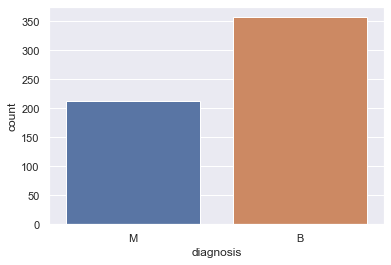

In [9]:
sns.countplot(x='diagnosis', data=df)

Dataset contains more Benign data than Malignant data

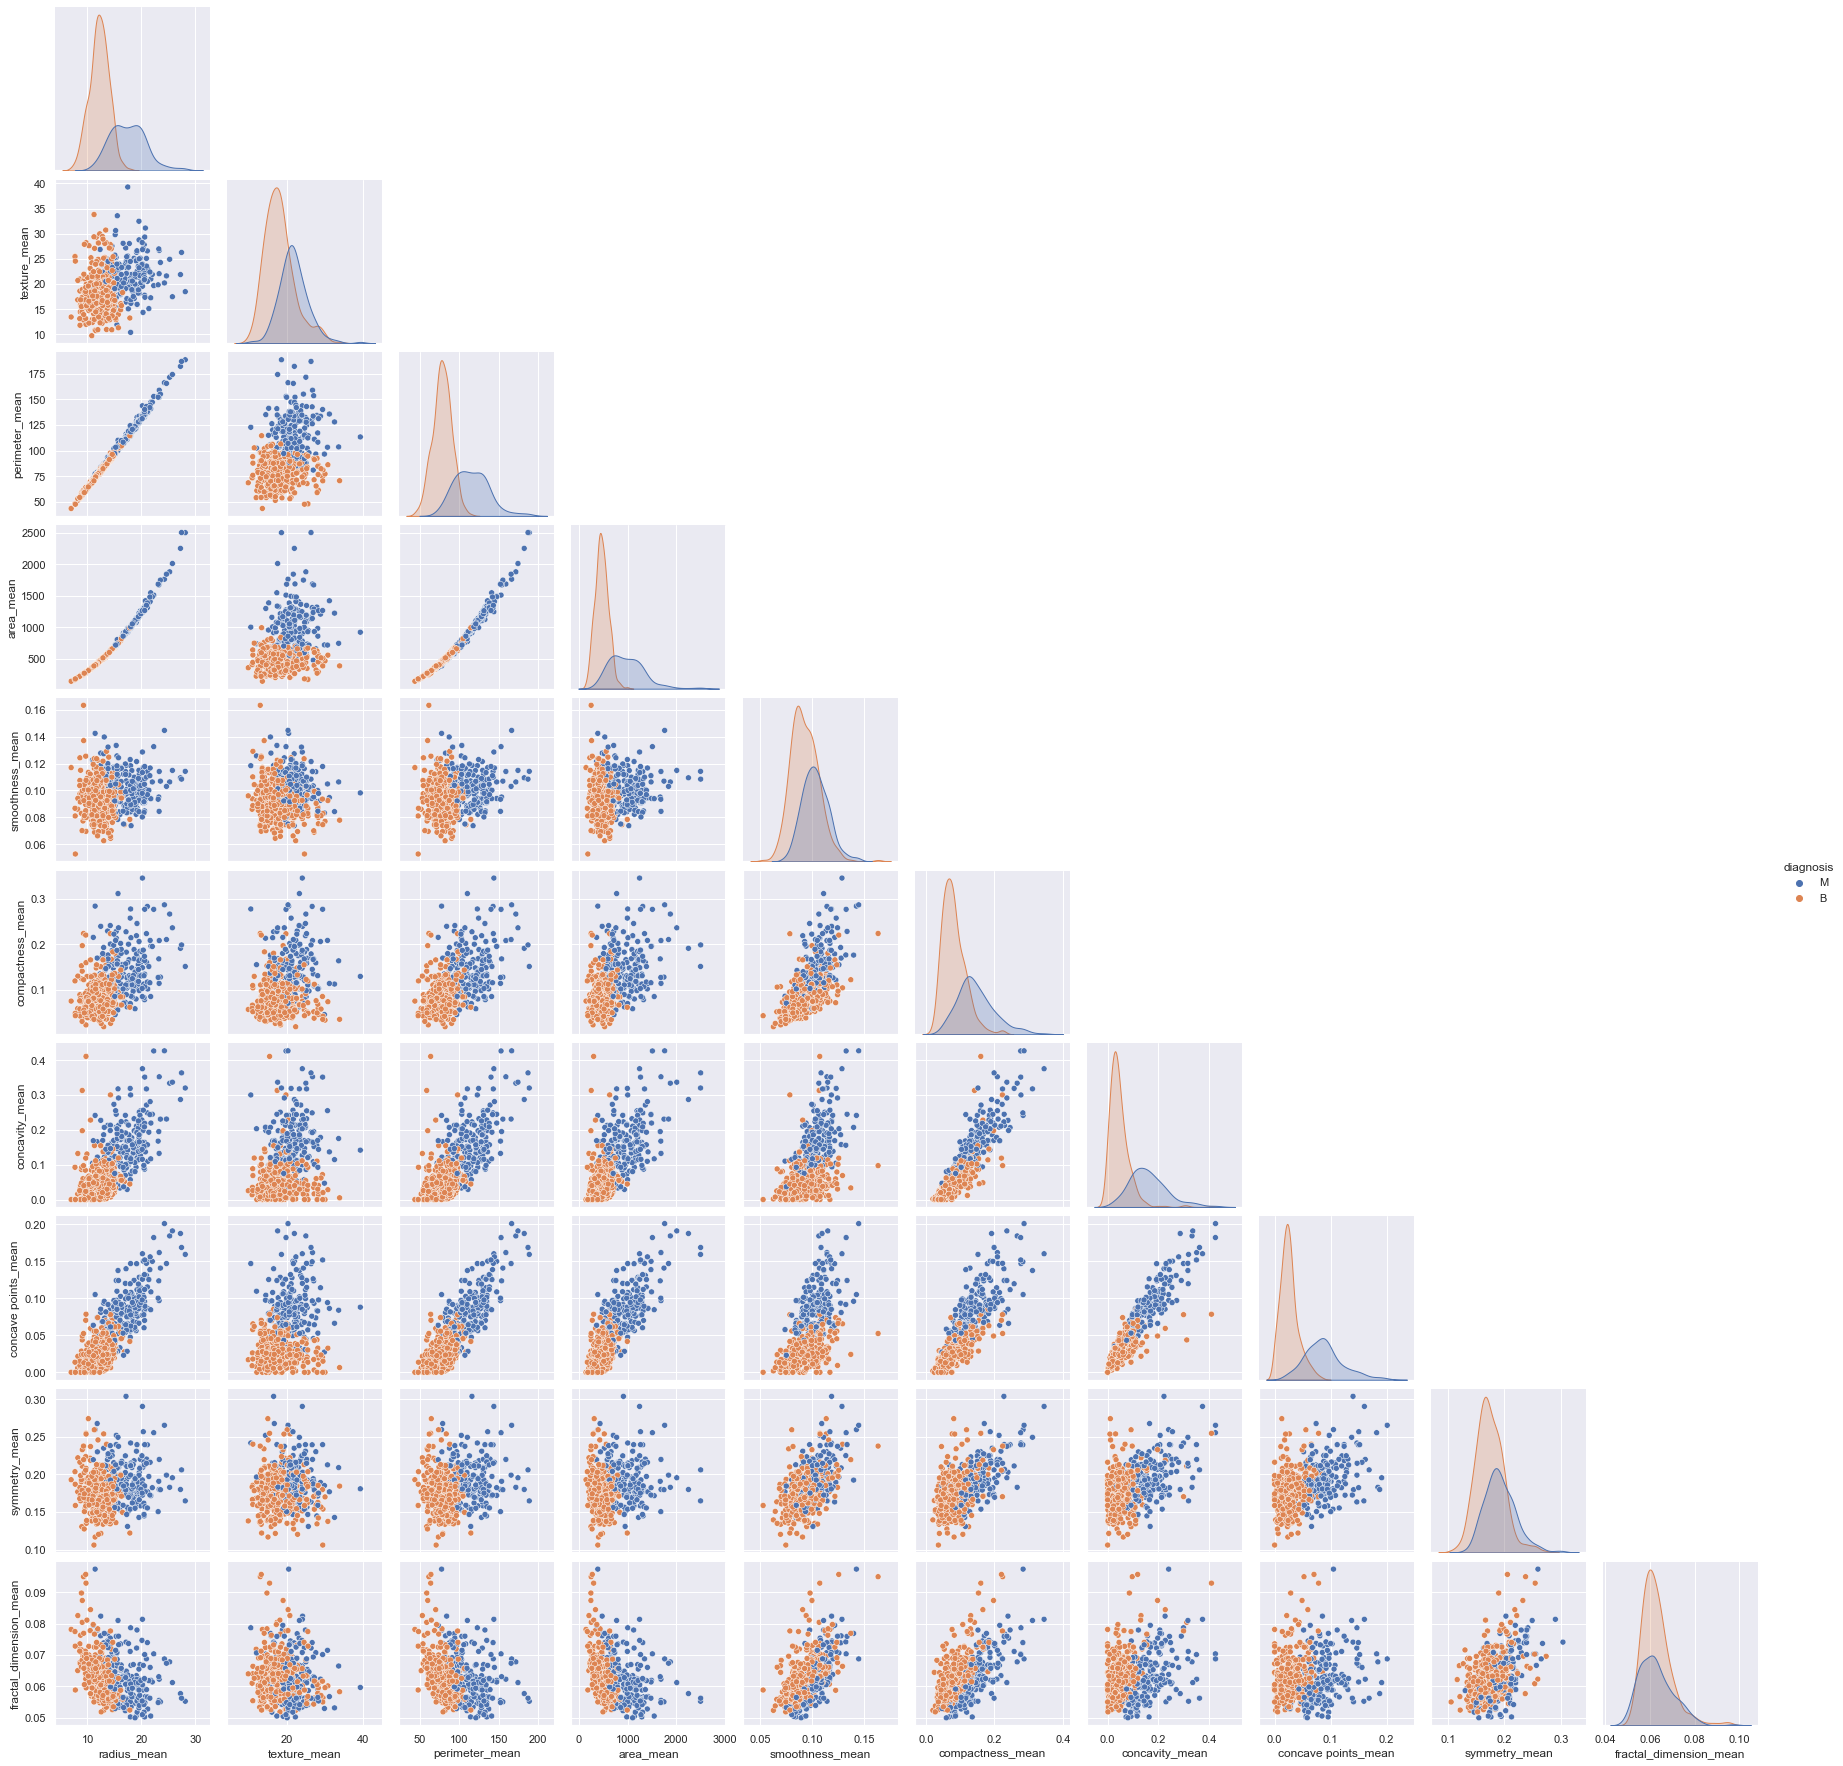

In [10]:
sns.pairplot(df, hue='diagnosis',corner=True)

The plot shows most features are closely correlated to one another especially between area and radius, area and perimeter, perimeter and radius.

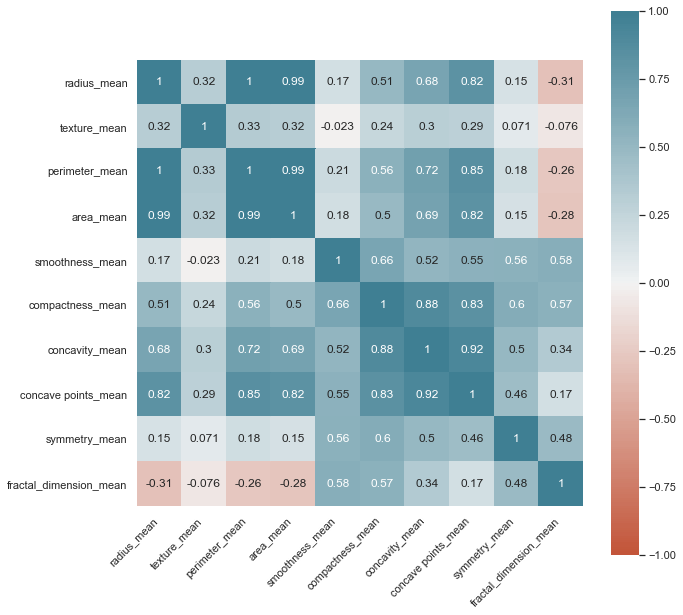

In [11]:
corr = df.corr()
fig, ax = plt.subplots(figsize=(10,10)) 
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True,
    annot = True,
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)

plt.show()

It can be seen from this heatmap, the darker the color, the more closely correlated the features are. 

In [12]:
cor_matrix = df.corr().abs()
upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(np.bool))
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.9)]
df_origin = df
df = df.drop(to_drop, axis = 1)
df.dtypes

diagnosis                  object
radius_mean               float64
texture_mean              float64
smoothness_mean           float64
compactness_mean          float64
concavity_mean            float64
symmetry_mean             float64
fractal_dimension_mean    float64
dtype: object

In [13]:
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.9)]
print(to_drop)

['perimeter_mean', 'area_mean', 'concave points_mean']


In [14]:
df_origin.dtypes

diagnosis                  object
radius_mean               float64
texture_mean              float64
perimeter_mean            float64
area_mean                 float64
smoothness_mean           float64
compactness_mean          float64
concavity_mean            float64
concave points_mean       float64
symmetry_mean             float64
fractal_dimension_mean    float64
dtype: object

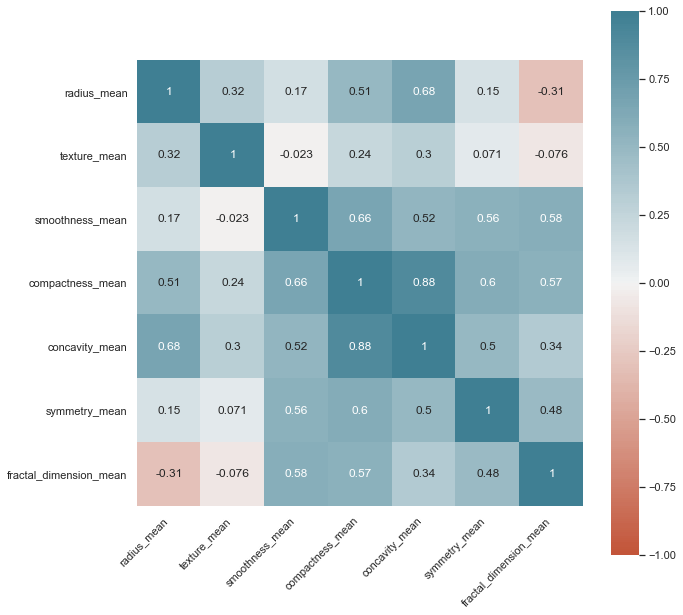

In [15]:
corr = df.corr()
fig, ax = plt.subplots(figsize=(10,10)) 
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True,
    annot = True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)

plt.show()

Pearson correlation heatmap after removing features with correlation above 0.9

# Training KNN Model

In [16]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

knn = KNeighborsClassifier(n_neighbors = 7)

In [17]:
convert = {"diagnosis": {"B": 0, "M": 1}}
df.replace(convert, inplace=True)
df.dtypes

diagnosis                   int64
radius_mean               float64
texture_mean              float64
smoothness_mean           float64
compactness_mean          float64
concavity_mean            float64
symmetry_mean             float64
fractal_dimension_mean    float64
dtype: object

Change 'diagnosis' column to integer with Benign as 0 and Malignant as 1

In [18]:
X_train, X_test, y_train, y_test = train_test_split(df.iloc[:,1:], df['diagnosis'], random_state = 42)
X_train.head()

,radius_mean,texture_mean,smoothness_mean,compactness_mean,concavity_mean,symmetry_mean,fractal_dimension_mean
287,12.89,13.12,0.06955,0.03729,0.02260,0.1337,0.05581
512,13.40,20.52,0.11060,0.14690,0.14450,0.2116,0.07325
402,12.96,18.29,0.07351,0.07899,0.04057,0.1874,0.05899
446,17.75,28.03,0.09997,0.13140,0.16980,0.1713,0.05916
210,20.58,22.14,0.09090,0.13480,0.16400,0.1765,0.05024


In [19]:
%timeit -n1000 knn.fit(X_train, y_train)

1.46 ms ± 38.1 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [20]:
y_pred = knn.predict(X_test)
print(y_pred)
print(y_test)

[0 1 1 0 0 1 1 0 0 0 1 1 1 1 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1
 0 1 1 0 1 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 1 0 0 0 1 1 0 0 0 1 1 0 0 1 1 0 1
 0 0 1 0 0 0 1 0 1 1 1 0 0 1 0 0 0 0 0 0 0 0 1 1 0 1 1 0 1 1 0 0 0 1 0 0 1
 0 0 1 0 1 0 0 0 0 1 0 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0]
204    0
70     1
131    1
431    0
540    0
      ..
89     0
199    1
411    0
18     1
390    0
Name: diagnosis, Length: 143, dtype: int64


In [21]:
%timeit -n1000 y_pred = knn.predict([[20.0, 30.0, 0.1, 0.05, 0.05, 0.1, 0.05]])

471 µs ± 10.4 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [22]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[83,  6],
       [12, 42]], dtype=int64)

This Confusion Matrix shows that we have 82 predicted class 0 are correct. 42 predicted class 1 are correct; 12 predicted class 1 which are actually class 0; 7 predicted class 0 which are actually class 1 .

In [23]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))

0.8741258741258742


This model has an accuracy score of approximately 0.867.

# Train with different k values

In [24]:
k_array = np.arange(1, 21, 2)

for k in k_array:
    knn_ex = KNeighborsClassifier(n_neighbors = k)
    knn_ex.fit(X_train, y_train)
    ac = accuracy_score(y_test, knn_ex.predict(X_test))
    print('k value: ',k)
    print('Accuracy score: ',ac)

k value:  1
Accuracy score:  0.8881118881118881
k value:  3
Accuracy score:  0.8601398601398601
k value:  5
Accuracy score:  0.8671328671328671
k value:  7
Accuracy score:  0.8741258741258742
k value:  9
Accuracy score:  0.8881118881118881
k value:  11
Accuracy score:  0.9020979020979021
k value:  13
Accuracy score:  0.8951048951048951
k value:  15
Accuracy score:  0.9020979020979021
k value:  17
Accuracy score:  0.9020979020979021
k value:  19
Accuracy score:  0.8881118881118881


There are many variant of accuracy score with respect to the list of k values. To avoid overfitting and within expenses means, its crucial to choose an optimum k value. 

# Training before removing high correlation features

In [25]:
X_train, X_test, y_train, y_test = train_test_split(df_origin.iloc[:,1:], df_origin['diagnosis'], random_state = 42)
X_train.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean
287,12.89,13.12,81.89,515.9,0.06955,0.03729,0.02260,0.01171,0.1337,0.05581
512,13.40,20.52,88.64,556.7,0.11060,0.14690,0.14450,0.08172,0.2116,0.07325
402,12.96,18.29,84.18,525.2,0.07351,0.07899,0.04057,0.01883,0.1874,0.05899
446,17.75,28.03,117.30,981.6,0.09997,0.13140,0.16980,0.08293,0.1713,0.05916
210,20.58,22.14,134.70,1290.0,0.09090,0.13480,0.16400,0.09561,0.1765,0.05024


In [26]:
%timeit -n1000 knn.fit(X_train, y_train)

1.82 ms ± 45.1 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [27]:
y_pred = knn.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.9020979020979021


When features with high correlation coefficient are included, the accuracy score are sligtly higher by 0.04.

In [28]:
%timeit -n1000 y_pred = knn.predict([[20.0, 30.0, 150.0, 900, 0.1, 0.05, 0.05, 0.03, 0.1, 0.05]])

490 µs ± 14.6 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [29]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[84,  5],
       [ 9, 45]], dtype=int64)

This Confusion Matrix shows that we have 85 predicted class 0 are correct. 46 predicted class 1 are correct; 8 predicted class 1 which are actually class 0; 4 predicted class 0 which are actually class 1 .

# Training with equal sample size from dataset with high correlation features removed

Random resampling with equal sample size for Malignant and Benign for dataset with high correlation features removed

In [30]:
df_equal = df.groupby('diagnosis').apply(lambda s: s.sample(212))
df_equal['diagnosis'].value_counts()

1    212
0    212
Name: diagnosis, dtype: int64

In [31]:
X_train, X_test, y_train, y_test = train_test_split(df_equal.iloc[:,1:], df_equal['diagnosis'], random_state = 42)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print(accuracy_score(y_test, y_pred))
confusion_matrix(y_test, y_pred)

0.8773584905660378


array([[51,  5],
       [ 8, 42]], dtype=int64)

In [32]:
%timeit knn.fit(X_train, y_train)

1.44 ms ± 40.7 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [33]:
%timeit knn.predict([[20.0, 30.0, 0.1, 0.05, 0.05, 0.1, 0.05]])

489 µs ± 12.2 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


This Confusion Matrix shows that we have 51 predicted class 0 are correct. 42 predicted class 1 are correct; 8 predicted class 1 which are actually class 0; 5 predicted class 0 which are actually class 1. This model has an accuracy score of 0.877

# Training with equal sample size from dataset before high correlation features removed

In [34]:
df_equal1 = df_origin.groupby('diagnosis').apply(lambda s: s.sample(212))
df_equal1['diagnosis'].value_counts()

B    212
M    212
Name: diagnosis, dtype: int64

In [35]:
X_train, X_test, y_train, y_test = train_test_split(df_equal1.iloc[:,1:], df_equal1['diagnosis'], random_state = 42)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print(accuracy_score(y_test, y_pred))
confusion_matrix(y_test, y_pred)

0.839622641509434


array([[48,  8],
       [ 9, 41]], dtype=int64)

In [36]:
%timeit knn.fit(X_train, y_train)

1.64 ms ± 43.5 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [37]:
%timeit knn.predict([[20.0, 30.0, 150.0, 900, 0.1, 0.05, 0.05, 0.03, 0.1, 0.05]])

514 µs ± 35.8 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


This Confusion Matrix shows that we have 47 predicted class 0 are correct. 39 predicted class 1 are correct; 11 predicted class 1 which are actually class 0; 9 predicted class 0 which are actually class 1. This model has an accuracy score of 0.811